In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/year-mix/case_year_mix.csv
/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/kaggle/input/pre-cog/cases/cases_2017.csv
/kaggle/input/pre-cog/cases/cases_2010.csv
/kaggle/input/pre-cog/cases/cases_2014.csv
/kaggle/input/pre-cog/cases/cases_2016.csv
/kaggle/input/pre-cog/cases/cases_2011.csv
/kaggle/input/pre-cog/keys/type_name_key.csv
/kaggle/input/pre-cog/keys/cases_district_key.csv
/kaggle/input/pre-cog/keys/act_key.csv
/kaggle/input/pre-cog/keys/disp_name_key.csv
/kaggle/input/pre-cog/keys/purpose_name_key.csv
/kaggle/input/pre-cog/keys/cases_state_key.csv
/kaggle/input/pre-cog/keys/section_key.csv
/kaggle/input/pre-cog/keys/cases_court_key.csv
/kaggle/input/pre-cog/keys/judge_case_merge_key.csv


Importing pre-processed file

In [2]:
cfinal = pd.read_csv('/kaggle/input/year-mix/case_year_mix.csv')
print(cfinal.head())

   Unnamed: 0               ddl_case_id  state_code  dist_code  court_no  \
0           0  01-01-01-201900000012017           1          1         1   
1           1  01-01-01-201900000022017           1          1         1   
2           2  01-01-01-201900000032017           1          1         1   
3           3  01-01-01-201900000042017           1          1         1   
4           4  01-01-01-201900000052017           1          1         1   

              judge_position female_defendant female_petitioner  \
0  chief judicial magistrate           0 male            0 male   
1  chief judicial magistrate           0 male            0 male   
2  chief judicial magistrate    -9998 unclear            0 male   
3  chief judicial magistrate           0 male            0 male   
4  chief judicial magistrate    -9998 unclear            0 male   

   female_adv_def  female_adv_pet  type_name  purpose_name  disp_name  
0           -9999               0     1943.0        3206.0         2

Dropping unnecessary columns

In [3]:
cfinal.drop(['Unnamed: 0'], axis=1, inplace=True)

Importing **Act and Sections** csv file

In [4]:
act_sec = pd.read_csv('/kaggle/input/pre-cog/acts_sections/acts_sections.csv')
print(act_sec.head())

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


                ddl_case_id      act  section bailable_ipc  \
0  06-03-02-210100004042014  17353.0      NaN          NaN   
1  23-34-01-229900001012019   4759.0      NaN          NaN   
2  13-18-03-204000030972016  17353.0      NaN          NaN   
3  23-28-01-220102000232016   4759.0      NaN          NaN   
4  01-35-05-203007002652012  17353.0      NaN          NaN   

   number_sections_ipc  criminal  
0                  1.0         1  
1                  NaN         1  
2                  1.0         1  
3                  NaN         1  
4                  1.0         1  


Dropping column due to data insufficiency based on analysis

In [5]:
act_sec.drop(['bailable_ipc'], axis=1, inplace=True)

Cleaning NaN values from the dataframe

In [6]:
act_new = act_sec.dropna()

In [7]:
act_new.reset_index(drop=True)

,ddl_case_id,act,section,number_sections_ipc,criminal
0,26-04-02-202400033072016,17353.0,3706.0,1.0,1
1,29-09-01-203700003932018,17353.0,3706.0,1.0,1
2,03-12-21-205500000332017,17353.0,3706.0,1.0,1
3,26-04-02-202400018552016,17353.0,3706.0,1.0,1
4,14-01-04-203600205652014,17353.0,3706.0,1.0,1
...,...,...,...,...,...
17906799,13-15-05-204800000022017,17353.0,1375166.0,1.0,1
17906800,13-06-02-207100022452018,17353.0,1375166.0,1.0,1
17906801,13-67-05-205500000062018,17353.0,1375166.0,1.0,1
17906802,13-67-04-205506000082017,17353.0,1375166.0,1.0,1


Dropping unknown and unclear gender rows

In [8]:
cfinal = cfinal[(cfinal['female_defendant'] == '0 male') | (cfinal['female_defendant'] == '1 female')]
print(cfinal.head())

                ddl_case_id  state_code  dist_code  court_no  \
0  01-01-01-201900000012017           1          1         1   
1  01-01-01-201900000022017           1          1         1   
3  01-01-01-201900000042017           1          1         1   
5  01-01-01-201900000062017           1          1         1   
7  01-01-01-201900000082017           1          1         1   

              judge_position female_defendant female_petitioner  \
0  chief judicial magistrate           0 male            0 male   
1  chief judicial magistrate           0 male            0 male   
3  chief judicial magistrate           0 male            0 male   
5  chief judicial magistrate           0 male          1 female   
7  chief judicial magistrate           0 male          1 female   

   female_adv_def  female_adv_pet  type_name  purpose_name  disp_name  
0           -9999               0     1943.0        3206.0         26  
1           -9999               1     1943.0        6212.0         2

In [9]:
cfinal = cfinal[(cfinal['female_petitioner'] == '0 male') | (cfinal['female_petitioner'] == '1 female')]

Dropping the **Gender of Advocate** columns as they don't affect the case outcome (based on analysis)

In [10]:
cfinal.drop(['female_adv_def', 'female_adv_pet'], axis=1, inplace=True)

Merging the dataframes based on the **'ddl_case_id'** index

In [11]:
data = cfinal.merge(act_new, left_on='ddl_case_id', right_on='ddl_case_id', how='left')
print(data.head())

                ddl_case_id  state_code  dist_code  court_no  \
0  01-01-01-201900000012017           1          1         1   
1  01-01-01-201900000022017           1          1         1   
2  01-01-01-201900000042017           1          1         1   
3  01-01-01-201900000062017           1          1         1   
4  01-01-01-201900000082017           1          1         1   

              judge_position female_defendant female_petitioner  type_name  \
0  chief judicial magistrate           0 male            0 male     1943.0   
1  chief judicial magistrate           0 male            0 male     1943.0   
2  chief judicial magistrate           0 male            0 male     1943.0   
3  chief judicial magistrate           0 male          1 female     1943.0   
4  chief judicial magistrate           0 male          1 female     1943.0   

   purpose_name  disp_name      act    section  number_sections_ipc  criminal  
0        3206.0         26      NaN        NaN                  Na

In [12]:
data_f = data.dropna()

In [13]:
data_f.reset_index(drop=True)

,ddl_case_id,state_code,dist_code,court_no,judge_position,female_defendant,female_petitioner,type_name,purpose_name,disp_name,act,section,number_sections_ipc,criminal
0,01-01-01-201900000062017,1,1,1,chief judicial magistrate,0 male,1 female,1943.0,6212.0,26,17353.0,841964.0,5.0,1.0
1,01-01-01-201900000082017,1,1,1,chief judicial magistrate,0 male,1 female,1943.0,6212.0,26,17353.0,1111430.0,5.0,1.0
2,01-01-01-201900000252017,1,1,1,chief judicial magistrate,0 male,0 male,1943.0,7136.0,26,17353.0,1129211.0,11.0,1.0
3,01-01-01-201900000302017,1,1,1,chief judicial magistrate,0 male,0 male,1943.0,6212.0,44,17353.0,1182576.0,6.0,1.0
4,01-01-01-201900000342017,1,1,1,chief judicial magistrate,0 male,1 female,1943.0,917.0,26,17353.0,1111430.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194253,32-01-01-213410000122018,32,1,1,principal district and sessions court,0 male,0 male,6540.0,5053.0,4,17353.0,954558.0,2.0,1.0
1194254,32-01-01-213410000132018,32,1,1,principal district and sessions court,0 male,0 male,6540.0,7419.0,4,17353.0,954558.0,1.0,1.0
1194255,32-01-01-213410000142018,32,1,1,principal district and sessions court,0 male,0 male,6540.0,2975.0,4,17353.0,954558.0,2.0,1.0
1194256,32-01-01-213410000152018,32,1,1,principal district and sessions court,0 male,0 male,6540.0,840.0,4,17353.0,954558.0,2.0,1.0


Importing the key CSV file for display name

In [14]:
dis = pd.read_csv('/kaggle/input/pre-cog/keys/disp_name_key.csv')
print(dis)

     year  disp_name  disp_name_s   count
0    2010          1     258 crpc   15765
1    2010          2       abated   22021
2    2010          3    absconded   16773
3    2010          4    acquitted  406015
4    2010          5      allowed  244023
..    ...        ...          ...     ...
457  2018         48       stayed     185
458  2018         49  transferred  394249
459  2018         50  uncontested     575
460  2018         51      untrace   29986
461  2018         52    withdrawn  221903

[462 rows x 4 columns]


Mananging data repititions in the dataframe

In [15]:
dis = dis[(dis['year'] == 2018)]
dis.drop(['year'], axis=1, inplace=True)
print(dis.head())

     disp_name disp_name_s    count
410          1    258 crpc    14443
411          2      abated    15656
412          3   absconded     2976
413          4   acquitted   207801
414          5     allowed  1104047


Restrict the outcome to selected categories viz. **'bail refused', 'dismissed', 'withdrawn', 'settled', 'bail rejected', 'convicted', 'bail granted', 'acquitted'**

In [65]:
dis = dis[(dis['disp_name'] == 4) | (dis['disp_name'] == 8) | (dis['disp_name'] == 10) | (dis['disp_name'] == 11) | (dis['disp_name'] == 20) | (dis['disp_name'] == 23) | (dis['disp_name'] == 46)]
print(dis.head())

     disp_name    disp_name_s   count
413          4      acquitted  207801
417          8   bail granted   74272
419         10   bail refused   31767
420         11  bail rejected   11693
429         20      convicted  416122


Merging the files based on the **'disp_name'** column

In [66]:
data_g = data_f.merge(dis, left_on="disp_name", right_on="disp_name", how="inner")
print(data_g.head())

                ddl_case_id  state_code  dist_code  court_no  \
0  01-01-01-201900001452017           1          1         1   
1  01-01-01-201900004062017           1          1         1   
2  01-01-01-203000001212017           1          1         1   
3  01-01-08-203000000602017           1          1         8   
4  01-01-08-203000000622017           1          1         8   

                judge_position female_defendant female_petitioner  type_name  \
0    chief judicial magistrate           0 male            0 male     1943.0   
1    chief judicial magistrate         1 female            0 male     1943.0   
2    chief judicial magistrate         1 female          1 female     5531.0   
3  civil judge junior division           0 male          1 female     5531.0   
4  civil judge junior division           0 male            0 male     5531.0   

   purpose_name  disp_name      act    section  number_sections_ipc  criminal  \
0        6212.0         23  17353.0  1182576.0       

In [67]:
data_g.drop(['count'], axis=1, inplace=True)

Setting the labels array

In [68]:
classes = ['acquitted', 'bail granted', 'bail refused', 'bail rejected', 'convicted', 'dismissed', 'settled']

In [69]:
print(classes)

['acquitted', 'bail granted', 'bail refused', 'bail rejected', 'convicted', 'dismissed', 'settled']


Dividing the dataframe columns into **features and targets**

In [70]:
feat = pd.DataFrame(data_g.iloc[:, [1,2,3,4,5,6,7,8,10,11,12,13]])
targ = pd.DataFrame(data_g.iloc[:, [9]])

In [71]:
targ.reset_index(drop=True)

,disp_name
0,23
1,23
2,23
3,23
4,23
...,...
118638,11
118639,11
118640,11
118641,11


Splitting the dataset into **training and testing** sets

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat, targ, test_size=0.20)

In [73]:
print(feat.head())

   state_code  dist_code  court_no               judge_position  \
0           1          1         1    chief judicial magistrate   
1           1          1         1    chief judicial magistrate   
2           1          1         1    chief judicial magistrate   
3           1          1         8  civil judge junior division   
4           1          1         8  civil judge junior division   

  female_defendant female_petitioner  type_name  purpose_name      act  \
0           0 male            0 male     1943.0        6212.0  17353.0   
1         1 female            0 male     1943.0        6212.0  17353.0   
2         1 female          1 female     5531.0        6212.0  17353.0   
3           0 male          1 female     5531.0        6212.0  17353.0   
4           0 male            0 male     5531.0        8448.0  17353.0   

     section  number_sections_ipc  criminal  
0  1182576.0                  8.0       1.0  
1  1064270.0                  7.0       1.0  
2  1176149.0  

Using Label Encoding to convert categroical features into integer encoding for classification

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

lenc = preprocessing.LabelEncoder()

X_train['state_code'] = lenc.fit_transform(X_train['state_code'])
X_train['dist_code'] = lenc.fit_transform(X_train['dist_code'])
X_train['court_no'] = lenc.fit_transform(X_train['court_no'])
X_train['judge_position'] = lenc.fit_transform(X_train['judge_position'])
X_train['female_defendant'] = lenc.fit_transform(X_train['female_defendant'])
X_train['female_petitioner'] = lenc.fit_transform(X_train['female_petitioner'])
X_train['type_name'] = lenc.fit_transform(X_train['type_name'])
X_train['purpose_name'] = lenc.fit_transform(X_train['purpose_name'])
#X_train['act'] = lenc.fit_transform(X_train['act'])
X_train['section'] = lenc.fit_transform(X_train['section'])
X_train['number_sections_ipc'] = lenc.fit_transform(X_train['number_sections_ipc'])
X_train['criminal'] = lenc.fit_transform(X_train['criminal'])

Using a **Random Forest Classifier** to classify the training set data (added class weights due to heavy imbalance in dataset categories)

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0, class_weight = 'balanced_subsample')

Training the dataset

In [86]:
rfc.fit(X_train[['state_code', 'dist_code', 'court_no', 'judge_position', 'female_defendant', 'female_petitioner', 'type_name', 'purpose_name', 'section', 'number_sections_ipc', 'criminal']], y_train['disp_name'])

RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       n_estimators=1000, random_state=0)

Using Label Encoding to convert categroical features of testing dataset into integer encoding for classification

In [87]:
X_test['state_code'] = lenc.fit_transform(X_test['state_code'])
X_test['dist_code'] = lenc.fit_transform(X_test['dist_code'])
X_test['court_no'] = lenc.fit_transform(X_test['court_no'])
X_test['judge_position'] = lenc.fit_transform(X_test['judge_position'])
X_test['female_defendant'] = lenc.fit_transform(X_test['female_defendant'])
X_test['female_petitioner'] = lenc.fit_transform(X_test['female_petitioner'])
X_test['type_name'] = lenc.fit_transform(X_test['type_name'])
X_test['purpose_name'] = lenc.fit_transform(X_test['purpose_name'])
#X_test['act'] = lenc.fit_transform(X_test['act'])
X_test['section'] = lenc.fit_transform(X_test['section'])
X_test['number_sections_ipc'] = lenc.fit_transform(X_test['number_sections_ipc'])
X_test['criminal'] = lenc.fit_transform(X_test['criminal'])

Predicting the case outcome using the model

In [88]:
prediction = rfc.predict(X_test[['state_code', 'dist_code', 'court_no', 'judge_position', 'female_defendant', 'female_petitioner', 'type_name', 'purpose_name', 'section', 'number_sections_ipc', 'criminal']])

Scoring the predictions of the model

In [89]:
print(rfc.score(X_test[['state_code', 'dist_code', 'court_no', 'judge_position', 'female_defendant', 'female_petitioner', 'type_name', 'purpose_name', 'section', 'number_sections_ipc', 'criminal']], y_test['disp_name']))

0.6897045808925787


Calculating and plotting the **confusion matrix**

In [90]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test['disp_name'], prediction))

[[ 2904    42    11     0  1526  2233   238]
 [    0    70    15     0     0    12     3]
 [    0     0     5     0     0     3     1]
 [    0     0     1     0     1     1     0]
 [  732     4     6     1  1887   185   139]
 [  821    80    58     2   565 11349   599]
 [   43     1     5     0    10    25   151]]


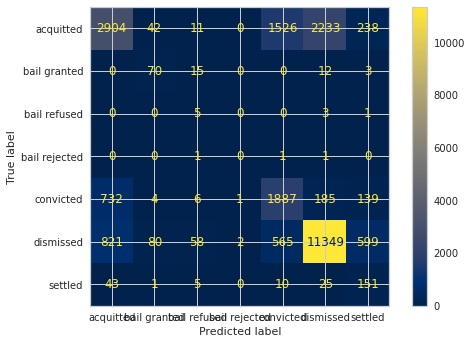

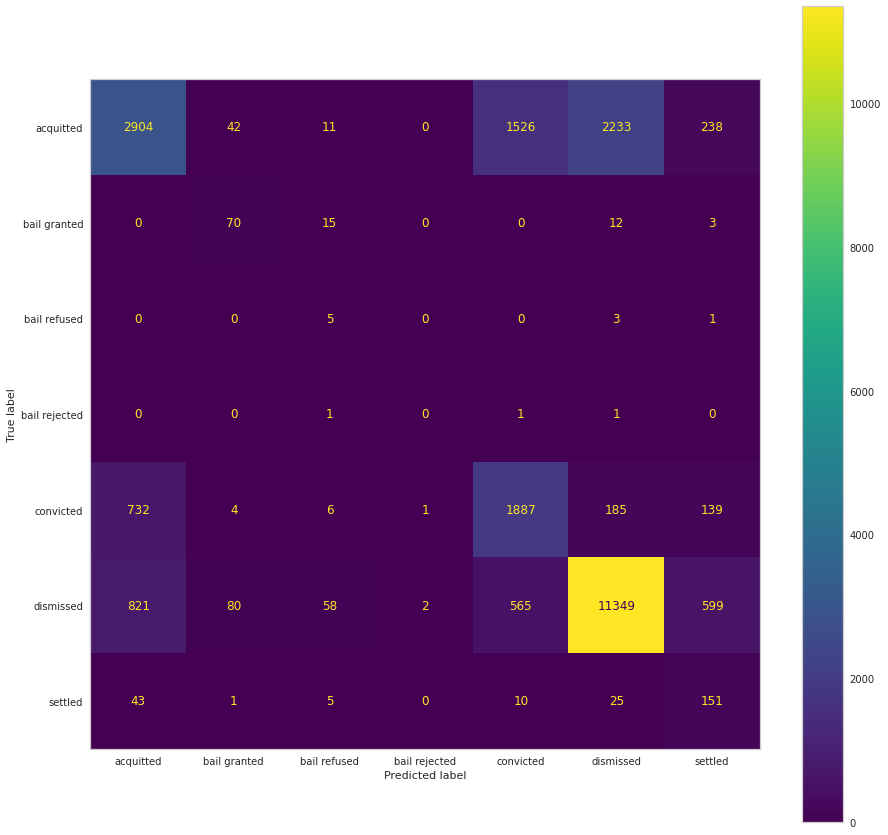

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, cmap = 'cividis', display_labels = classes)
fig, ax = plt.pyplot.subplots(figsize=(15,15))
plt.pyplot.grid(False)
cmp.plot(ax = ax)

plt.pyplot.savefig('matrix_f.png')

Installing **Dython** to analyze categrocial variables in a **correlation matrix and heatmap**

In [43]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


Filtering required variables

In [58]:
data_d = data_g[['state_code', 'dist_code', 'court_no', 'judge_position', 'female_defendant', 'female_petitioner', 'type_name', 'purpose_name', 'disp_name', 'section', 'number_sections_ipc']].copy()

Visualizing the **Heatmap**

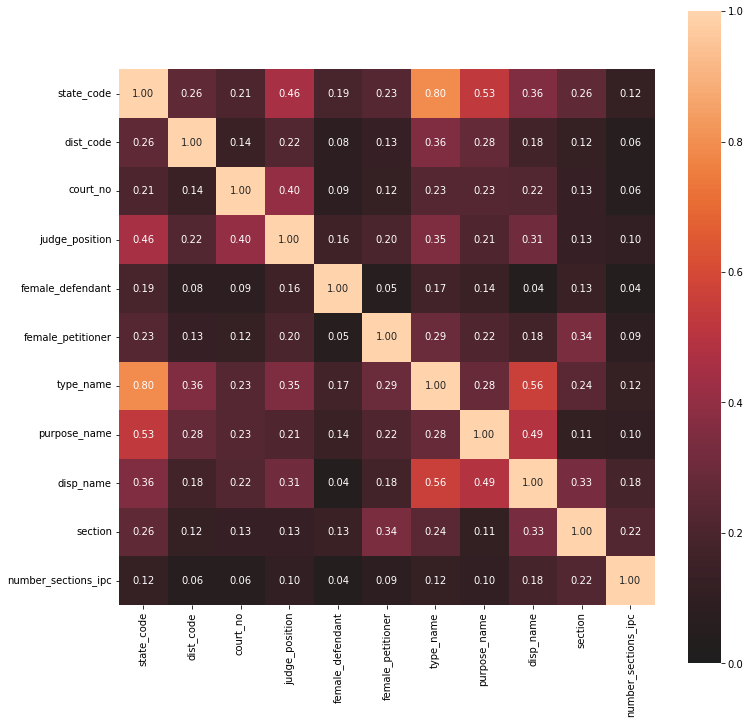

<Figure size 432x288 with 0 Axes>

In [59]:
from dython.nominal import associations
associations(data_d, nominal_columns= 'all', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', ax=None, figsize=(12,12), annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)
plt.pyplot.savefig('heat_map_outcome.png')

/opt/conda/lib/python3.7/site-packages/yellowbrick/base.py:390: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


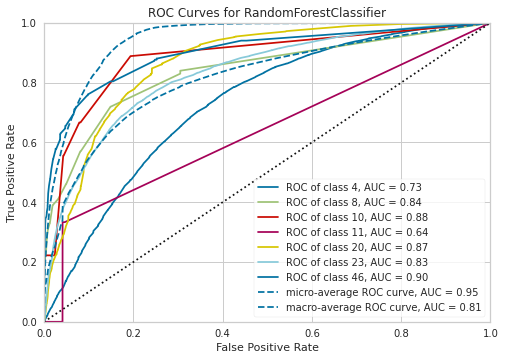

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [92]:
from yellowbrick.classifier import ROCAUC

oz = ROCAUC(RandomForestClassifier())
oz.fit(X_train, y_train)
oz.score(X_test, y_test)
oz.show()

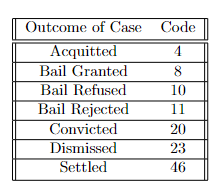

In [93]:
from IPython import display
display.Image ("/kaggle/input/labels/Labels.png")